In [2]:
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics  # 통계함수가 들어있는 패키지
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
shap.initjs()

In [3]:
dia = load_diabetes()

In [4]:
x_df = pd.DataFrame(dia["data"], columns=dia["feature_names"]).iloc[:, :-1]

In [5]:
y_ori = dia["target"]
y = y_ori >= 126

In [6]:
x_train, x_test, y_train, y_test = train_test_split(
    x_df, y, test_size=0.2, shuffle=True, random_state=12345
)

In [7]:
clf = RandomForestClassifier(n_estimators=1000, random_state=12345)
clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=12345)

In [8]:
clf.score(x_train, y_train)

1.0

In [9]:
clf.feature_importances_

array([0.08095126, 0.02756551, 0.18275651, 0.10285185, 0.08874892,
       0.0957397 , 0.12938655, 0.0691165 , 0.2228832 ])

In [10]:
dia["feature_names"]

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

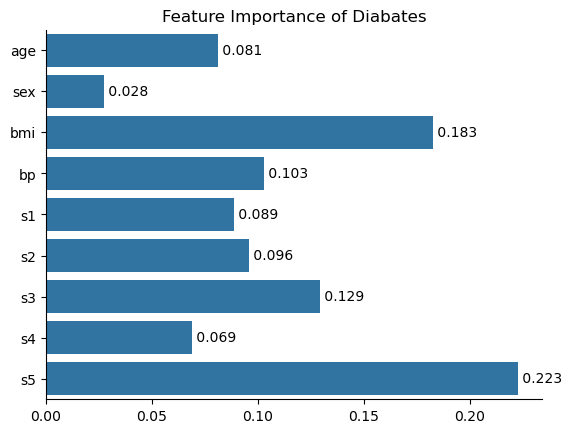

In [11]:
ax = sns.barplot(x=clf.feature_importances_, y=dia["feature_names"][:9])
ax.bar_label(ax.containers[0], fmt=" %.3f")
plt.gca().spines[["right", "top"]].set_visible(False)
plt.title("Feature Importance of Diabates")
plt.show()

In [12]:
y_pred = clf.predict(x_test)
mat = metrics.confusion_matrix(y_test, y_pred, labels=[True, False])
pd.DataFrame(mat, columns=["d", "n"], index=["dt", "nt"])

## 앞에서 배운 TP 같은 것을 그래프로 그려낸 것

,d,n
dt,35,14
nt,17,23
